# Project 02 - Due Friday, November 11 at 12pm

*Objectives*: Gain experience loading a transactional dataset into a relational database model you define yourself and using SQL to explore its contents. Transform the data into a star schema, documenting the schema visually, and explore the transformed data analytically by writing and executing a number of SQL queries using common syntax and functions and describing your findings.  Gain practice working on these tasks with a partner.

*Grading criteria*: The tasks should all be completed, and questions should all be answered with SQL queries, diagrams, and charts in the space provided, unless a text answer is requested.  The notebook itself should be completely reproducible at datanotebook.org, from start to finish: another person should be able to use the same code to obtain the same results as yours.  Note that you will receive no more than partial credit if you do not add text/markdown cells explaining your thinking at each major step in each problem.

*Attestation*: **Work in pairs**.  At the end of your submitted notebook, identify the work each partner performed and attest that each contributed substantially to the work.

*Deadline*: Friday, November 11, 12pm.  One member of each pair must submit your notebook to Blackboard; you should not both submit it separately.  You may each push a copy to your own GitHub repository.


## Setup - select and obtain data

The US City Open Data Census has a variety of [transactional data from all over the country](http://us-city.census.okfn.org/).  Select one topic and one city from this Census, download the data, and explain your reason for this choice before proceeding.  Provide a link to the web page for the data set you've chosen.

I strongly encourage you to select a dataset from among the following topics:  Crime, Property Assessment, Campaign Finance Contributions, Service Requests (311), and Web Analytics.

By *transactional* data I mean records at the grain of one event per business process.  In the case of Service Requests (311), for example, that would require data at the level of each individual report of a service request.  If this isn't clear, think about the bike trip data - each individual ride was included - and look for data at that level of event/process specificity.  Avoid data like the Connecticut boating data, which was summarized by year, not individual transactions.

Please aim for a dataset of at least 10,000 individual records, but less than 250,000 records.  A little more or a little less is okay, but try to stay within these limits.

# Each groupmate contributes equally. We do every question together.
Yatao Lu
Sifan Du

## Problem 1 - examine the data (20 points)

Use `csvstat`, `pandas`, or other tools as you see fit and observe the contents of your dataset.  Review important points from any metadata provided.  Describe what you see:  What do the columns mean?  Are there null values?  Which columns interest you the most?  Which columns present some opportunities, challenges, or questions you would like to ask?

In [1]:
!wget https://data.kcmo.org/api/views/kbzx-7ehe/rows.csv?accessType=DOWNLOAD

--2016-11-11 16:52:47--  https://data.kcmo.org/api/views/kbzx-7ehe/rows.csv?accessType=DOWNLOAD
Resolving data.kcmo.org (data.kcmo.org)... 52.206.140.199
Connecting to data.kcmo.org (data.kcmo.org)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [  <=>                 ]  26.12M  1.81MB/s   in 15s    

Last-modified header invalid -- time-stamp ignored.
2016-11-11 16:53:03 (1.69 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [27393897]



In [2]:
!mv rows.csv?accessType=DOWNLOAD rows.csv

In [3]:
!wc -l rows.csv

365652 rows.csv


In [4]:
!csvcut -n rows.csv

  1: Report_No
  2: Reported_Date
  3: Reported Time
  4: From_Date
  5: From Time
  6: To_Date
  7: To Time
  8: Offense
  9: IBRS
 10: Description
 11: Beat
 12: Address
 13: City
 14: Zip Code
 15: Rep_Dist
 16: Area
 17: DVFlag
 18: Invl_No
 19: Involvement
 20: Race
 21: Sex
 22: Age
 23: Location 1
 24: Firearm Used Flag


In [5]:
!csvstat rows.csv

  1. Report_No
	<class 'int'>
	Nulls: False
	Min: 70045155
	Max: 160063988
	Sum: 18289236218567
	Mean: 150033520.79611325
	Median: 150047086
	Standard Deviation: 743016.5941889622
	Unique values: 50325
	5 most frequent values:
		150029952:	38
		150010981:	38
		150050059:	33
		150021471:	33
		150000737:	33
  2. Reported_Date
	<class 'datetime.date'>
	Nulls: False
	Min: 2015-01-01
	Max: 2015-12-31
	Unique values: 365
	5 most frequent values:
		2015-12-08:	463
		2015-09-08:	460
		2015-10-05:	457
		2015-09-25:	440
		2015-09-22:	440
  3. Reported Time
	<class 'datetime.time'>
	Nulls: False
	Min: 00:01:00
	Max: 23:59:00
	Unique values: 1439
	5 most frequent values:
		08:00:00:	255
		11:00:00:	230
		16:00:00:	209
		00:01:00:	206
		12:00:00:	204
  4. From_Date
	<class 'datetime.date'>
	Nulls: True
	Min: 1915-07-13
	Max: 2015-12-31
	Unique values: 749
	5 most frequent values:
		2015-08-01:	493
		2015-09-17:	480
		2015-09-25:	449
		2015-01-01:	449
		2015-08-28:	443
  5. From Time
	<class 'str'>


  1: Report_No: the identifier of each crime
  2: Reported_Date: the reported date of each of offence: yy-mm-dd
  3: Reported Time: the reported time of each crime
  4: From_Date: the start date of the offence
  5: From Time: the start time of the offence
  6: To_Date: the end date of the crime
  7: To Time: the end time of the crime
  8: Offense: the id number fra each crime event
  9: IBRS: Intensive Behavioral Residential Service Number
 10: Description: the description of each crime type
 11: Beat: the id number of beat
 12: Address: the address where the crime happened
 13: City: the city where the cirme happende
 14: Zip Code: zipcode of the crime happened
 15: Rep_Dist: report distribution
 16: Area: the area of the crime happened
 17: DVFlag: the address relationed information of crime happened
 18: Invl_No: the number of persopn involved in this crime event
 19: Involvement: wether this person is a vic(victim)or sus(sus)
 20: Race: the race of crime conducter
 21: Sex: the gender of crime conductor
 22: Age: the age of the criem conductor
 23: Location 1: the primary scene of crime happened
 24: Firearm Used Flag: wehther the firearm is involved in this crime event

NULL VALUE:
report_no 	
reported_date 	
reported_time 	
from_date 
from_time 	
to_date 	
to_time 	
offense 	
ibrs 	
description 
beat 	
address 
city 
zip_code 
rep_dist 
area 
dvflag 
invl_no 
involvement 	
race
sex 
age 	
location_1 	
firearm_used_flag 	
reported_year 
reported_month 	
reported_day 	

Which columns interest you the most? 
 1: Report_No
  2: Reported_Date
 10: Description
 16: Area

we are interested in therelationship between the number of crime and time.
we are interested in therelationship between the number of crime and location.
we are interested in therelationship between the number of crime and crime type.



In [6]:
!csvcut -c 2,3,4,5,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22 rows.csv > rows_final.csv

In [7]:
!csvcut rows_final.csv | head | csvlook

|-------------------------+---------------+------------------------+-----------+---------+------+----------------------+------+---------------------+-------------+----------+----------+------+--------+---------+-------------+------+-----+------|
|  Reported_Date          | Reported Time | From_Date              | From Time | Offense | IBRS | Description          | Beat | Address             | City        | Zip Code | Rep_Dist | Area | DVFlag | Invl_No | Involvement | Race | Sex | Age  |
|-------------------------+---------------+------------------------+-----------+---------+------+----------------------+------+---------------------+-------------+----------+----------+------+--------+---------+-------------+------+-----+------|
|  09/21/2015 12:00:00 AM | 14:20         | 01/19/2015 12:00:00 AM |           | 401     | 13A  | Aggravated Assault ( |      |                     |             |          |          |      | U      | 1       | SUS         | W    | F   | 27   |
|  09/21/2015 12

## Problem 2 - define a database model, load the data, and explore (20 points)

Based on what you found above, create and connect to a new database, define a database table in it, and load this dataset into it.  You may use either of the methods for this step you have seen in earlier class notebooks.  You may choose to eliminate variables/columns if they are not relevant or interesting to you - explain your reasoning if you do.  Either way, you should load a majority of the columns present in the source dataset as it is in its raw form into the database, and all of its rows.

Once your data has loaded successfully, run a `COUNT(*)` query to verify that all the data has loaded correctly.

Explore the data to zero in on a few themes you would like to further study analytically.  Discuss columns that present opportunities for extraction into dimensions, and identify the specific columns that contain facts you want to measure.

In [8]:
!echo 'redspot'| sudo -S service postgresql restart

[sudo] password for jovyan: Restarting PostgreSQL 9.5 database server: main.


In [9]:
%load_ext sql

/opt/conda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/opt/conda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [10]:
!createdb -U dbuser p2

In [11]:
%sql postgresql://dbuser@localhost:5432/p2

'Connected: dbuser@p2'

In [12]:
%%sql
SELECT column_name, data_type, character_maximum_length, is_nullable
FROM INFORMATION_SCHEMA.COLUMNS WHERE table_name = 'crime';

0 rows affected.


column_name,data_type,character_maximum_length,is_nullable


In [13]:
%%sql
DROP TABLE IF EXISTS crime;
CREATE TABLE crime (
    Report_No INTEGER,
    Reported_Date TIMESTAMP,
    Reported_Time VARCHAR(100),
    From_Date TIMESTAMP,
    From_Time VARCHAR(100),
    To_Date TIMESTAMP,
    To_Time VARCHAR(100),
    Offense INTEGER,
    IBRS VARCHAR(100),
    Description VARCHAR(100),
    Beat VARCHAR(100),
    Address VARCHAR(150),
    City VARCHAR(120),
    Zip_Code VARCHAR(100),
    Rep_Dist VARCHAR(120),
    Area VARCHAR(40),
    DVFlag VARCHAR(30),
    Invl_No VARCHAR(100),
    Involvement VARCHAR(40),
    Race VARCHAR(10),
    Sex VARCHAR(10),
    Age INTEGER,
    Location_1 VARCHAR(1000),
    Firearm_Used_Flag VARCHAR(200)    
)


Done.
Done.


[]

In [14]:
!pwd

/home/jovyan/work


In [15]:
%%sql
COPY crime FROM '/home/jovyan/work/rows.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

121901 rows affected.


[]

In [16]:
%%sql
SELECT COUNT(*) FROM crime

1 rows affected.


count
121901


In [17]:
%%sql
SELECT 
    TO_CHAR(reported_date, 'YYYY') AS reported_year,
    TO_CHAR(reported_date, 'MM') AS reported_month,
    TO_CHAR(reported_date, 'DD') AS reported_day
FROM crime
LIMIT 20;

20 rows affected.


reported_year,reported_month,reported_day
2015,09,21
2015,09,21
2015,09,21
2015,09,21
2015,09,21
2015,09,21
2015,12,20
2015,05,16
2015,05,16
2015,03,25


In [18]:
%%sql
ALTER TABLE crime
ADD COLUMN reported_year INTEGER,
ADD COLUMN reported_month INTEGER,
ADD COLUMN reported_day INTEGER;

Done.


[]

In [19]:
%%sql
SELECT column_name
FROM INFORMATION_SCHEMA.COLUMNS WHERE table_name = 'crime';

27 rows affected.


column_name
report_no
reported_date
reported_time
from_date
from_time
to_date
to_time
offense
ibrs
description


In [20]:
%%sql
UPDATE crime SET (reported_year, reported_month, reported_day) = 
(  
    CAST(TO_CHAR(reported_date, 'YYYY') AS INTEGER),
    CAST(TO_CHAR(reported_date, 'MM') AS INTEGER),
    CAST(TO_CHAR(reported_date, 'DD') AS INTEGER)
 );



121901 rows affected.


[]

In [21]:
%%sql
SELECT reported_year,
       reported_month, 
       reported_day,
        reported_date
FROM crime
LIMIT 10
;

10 rows affected.


reported_year,reported_month,reported_day,reported_date
2015,6,24,2015-06-24 00:00:00
2015,7,5,2015-07-05 00:00:00
2015,7,21,2015-07-21 00:00:00
2015,10,12,2015-10-12 00:00:00
2015,1,2,2015-01-02 00:00:00
2015,1,22,2015-01-22 00:00:00
2015,12,8,2015-12-08 00:00:00
2015,12,15,2015-12-15 00:00:00
2015,12,24,2015-12-24 00:00:00
2015,2,2,2015-02-02 00:00:00


In [22]:
%%sql
SELECT *
FROM crime
LIMIT 10;

10 rows affected.


report_no,reported_date,reported_time,from_date,from_time,to_date,to_time,offense,ibrs,description,beat,address,city,zip_code,rep_dist,area,dvflag,invl_no,involvement,race,sex,age,location_1,firearm_used_flag,reported_year,reported_month,reported_day
150007913,2015-02-02 00:00:00,17:10,2015-02-02 00:00:00,16:50,None,None,2601,90Z,Misc Violation,112,1100 LOCUST ST,KANSAS CITY,None,PJ1029,CPD,U,1,SUS,U,U,None,"1100 LOCUST STKANSAS CITY(39.10091, -94.577328)",N,2015,2,2
150075116,2015-10-19 00:00:00,3:35,2015-10-19 00:00:00,3:28,None,None,901,200,Arson,134,4600 HARRISON ST,KCMO,64110,PJ3708,CPD,U,3,VIC,W,F,49,"4600 HARRISON STKCMO 64110(39.043583, -94.57405)",N,2015,10,19
150032721,2015-05-14 00:00:00,14:20,2015-05-14 00:00:00,14:20,None,None,2601,90Z,Misc Violation,112,1100 LOCUST ST,KANSAS CITY,None,PJ1029,CPD,U,1,VIC,None,None,None,"1100 LOCUST STKANSAS CITY(39.10091, -94.577328)",N,2015,5,14
150028442,2015-04-27 00:00:00,22:51,2015-04-27 00:00:00,22:15,None,None,901,200,Arson,125,3400 WABASH AV,KCMO,64109,PJ2797,CPD,U,4,VIC,B,M,19,"3400 WABASH AVKCMO 64109(39.064467, -94.554275)",N,2015,4,27
150053836,2015-08-01 00:00:00,17:10,2015-08-01 00:00:00,17:04,None,None,901,200,Arson,331,3000 WALROND AV,KCMO,64128,PJ2495,EPD,U,1,SUS,U,U,None,"3000 WALROND AVKCMO 64128(39.071451, -94.545981)",N,2015,8,1
150043488,2015-06-24 00:00:00,18:00,2015-06-24 00:00:00,18:00,None,None,2601,90Z,Misc Violation,112,1100 LOCUST ST,KANSAS CITY,None,PJ1029,CPD,U,1,VIC,None,None,None,"1100 LOCUST STKANSAS CITY(39.10091, -94.577328)",N,2015,6,24
150083313,2015-11-18 00:00:00,11:00,None,None,None,None,1849,35A,Possession/Sale/Dist,999,5200 STERLING AV,RAYTOWN,None,PJX001,OSPD,U,1,VIC,None,None,None,"5200 STERLING AVRAYTOWN(39.027984, -94.448514)",N,2015,11,18
150023343,2015-04-07 00:00:00,11:40,2015-04-07 00:00:00,11:30,None,None,2601,90Z,Misc Violation,121,700 PASEO,KANSAS CITY,64106,PJ0756,CPD,U,2,VIC,None,None,None,"700 PASEOKANSAS CITY 64106(39.105286, -94.563725)",N,2015,4,7
150078842,2015-11-01 00:00:00,19:36,2015-11-01 00:00:00,19:23,None,None,901,200,Arson,324,4900 E 24 ST,KCMO,64127,PJ1965,EPD,U,1,SUS,U,U,None,"4900 E 24 STKCMO 64127(39.082047, -94.526529)",N,2015,11,1
150075461,2015-10-20 00:00:00,12:31,2015-10-20 00:00:00,11:33,None,None,2601,90Z,Misc Violation,631,1200 NE 44 ST,KCMO,64116,PC1134,SCP,U,1,VIC,W,F,73,"1200 NE 44 STKCMO 64116(39.174269, -94.566279)",N,2015,10,20


In [23]:
%%sql
SELECT reported_year as Reported_Year, 
COUNT(DISTINCT report_no) as Number_of_Crimes
FROM crime
GROUP BY reported_year
ORDER BY reported_year ASC
;

1 rows affected.


reported_year,number_of_crimes
2015,50325


In [24]:
%%sql
SELECT reported_month as Reported_Month, 
COUNT(DISTINCT report_no) as Number_of_Crimes
FROM crime
GROUP BY reported_month
ORDER BY reported_month
;

12 rows affected.


reported_month,number_of_crimes
1,4308
2,3367
3,4049
4,4071
5,4248
6,4331
7,4564
8,4579
9,4580
10,4262


/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


crimes-month


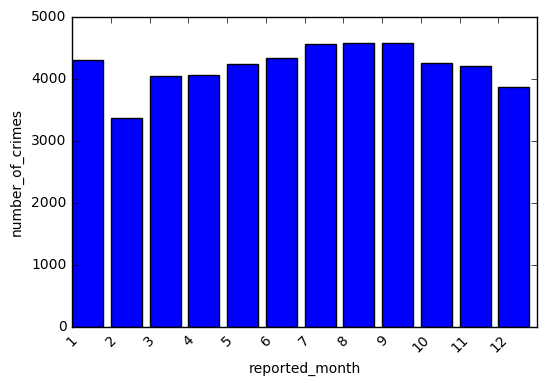

In [25]:
%matplotlib inline
result = _
result.bar()
!echo 'crimes-month'

In [26]:
%%sql
DROP TABLE IF EXISTS crime_clean;
CREATE TABLE crime_clean AS( 
SELECT *
FROM crime 
WHERE  Report_No is not null)
;

Done.
121901 rows affected.


[]

In [27]:
%%sql
UPDATE crime_clean SET Reported_Time = 'Null' where Reported_Time is null;
UPDATE crime_clean SET From_Time = 'Null' where From_Time is null;
UPDATE crime_clean SET Offense = -999 where Offense is null;
UPDATE crime_clean SET IBRS = 'Null' where IBRS is null;
UPDATE crime_clean SET Description = 'Null' where Description is null;
UPDATE crime_clean SET Beat = 'Null' where Beat is null;
UPDATE crime_clean SET Address = 'Null' where Address is null;
UPDATE crime_clean SET City = 'Null' where City is null;
UPDATE crime_clean SET Zip_Code = 'Null' where Zip_Code is null;
UPDATE crime_clean SET Rep_Dist = 'Null' where Rep_Dist is null;
UPDATE crime_clean SET Area = 'Null' where Area is null;
UPDATE crime_clean SET DVFlag = 'Null' where DVFlag is null;
UPDATE crime_clean SET Invl_No = 'Null' where Invl_No is null;
UPDATE crime_clean SET Involvement = 'Null' where Involvement is null;
UPDATE crime_clean SET Race = 'Null' where Race is null;
UPDATE crime_clean SET Sex = 'Null' where Sex is null;
UPDATE crime_clean SET Age = -999 where Age is null;
UPDATE crime_clean SET Location_1 = 'Null' where Location_1 is null;
UPDATE crime_clean SET Firearm_Used_Flag = 'Null' where Firearm_Used_Flag is null;

0 rows affected.
269 rows affected.
0 rows affected.
912 rows affected.
0 rows affected.
157 rows affected.
26 rows affected.
26 rows affected.
4438 rows affected.
220 rows affected.
220 rows affected.
0 rows affected.
0 rows affected.
0 rows affected.
16746 rows affected.
16746 rows affected.
50087 rows affected.
26 rows affected.
0 rows affected.


[]

## Problem 3 - define a star schema, and load your data into it (30 points)

Define a star schema consisting of at least one fact table and at least two dimensions.  Transform your source data into the new fact table and dimensions.  Discuss your key modeling decisions.

Document your star schema with a diagram.  There several tools available for this, such as Google Docs and Microsoft Visio.

In [28]:
!pwd

/home/jovyan/work


In [29]:
from IPython.display import Image
PATH = "/home/jovyan/work/"

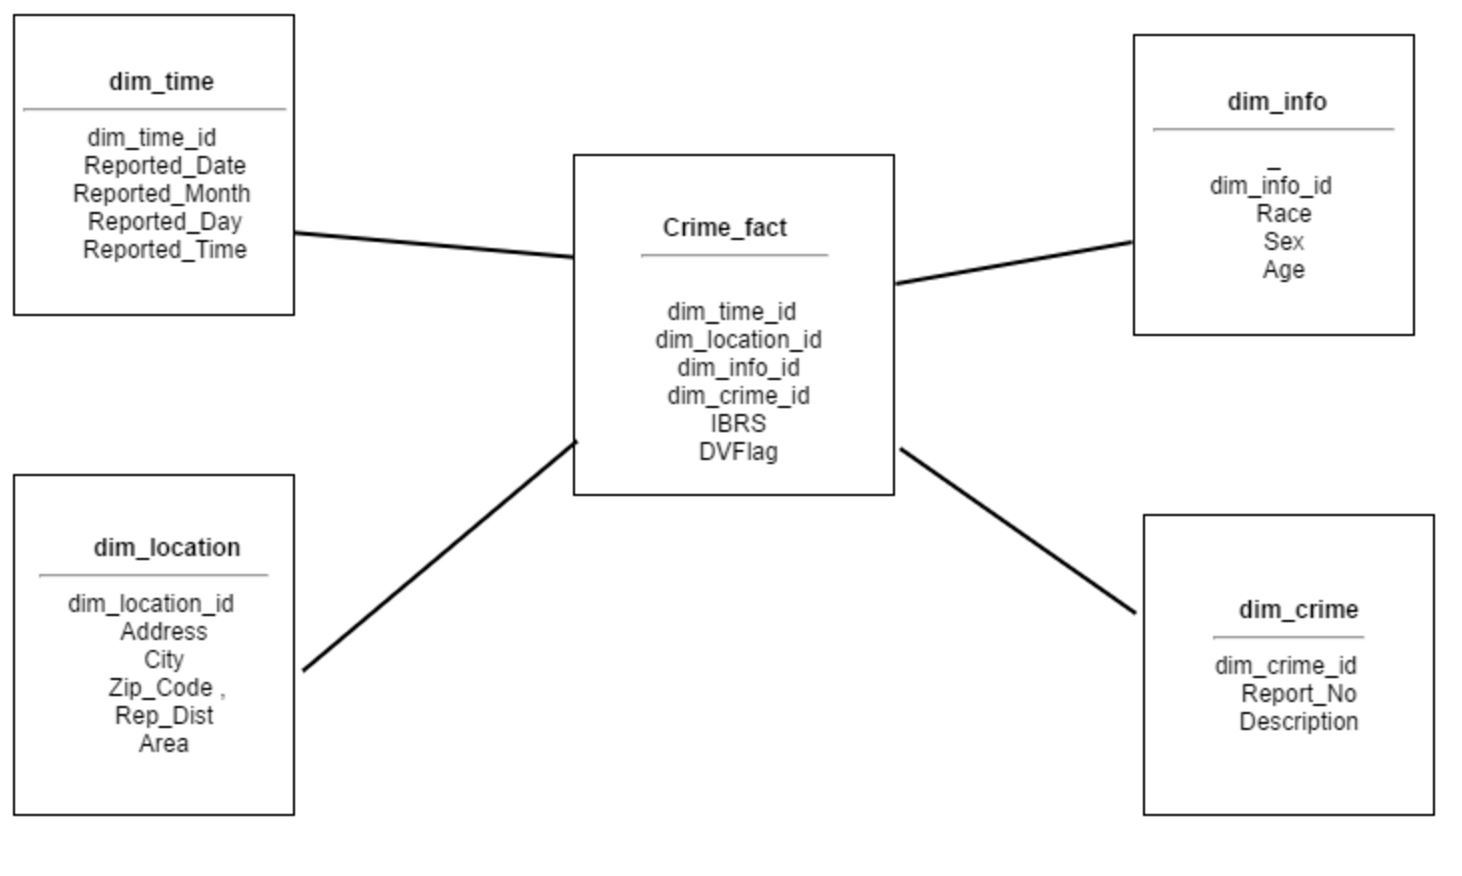

In [30]:
Image(filename = PATH + "star_schema.jpg", width=1000, height=1000)

Dimension for Time:

In [31]:
%%sql
DROP TABLE IF EXISTS dim_time;
CREATE TABLE dim_time (
    dim_time_id SERIAL PRIMARY KEY,
    Reported_Date TIMESTAMP,
    Reported_Month INTEGER, 
    Reported_Day INTEGER,
    Reported_Time VARCHAR(100)
)

Done.
Done.


[]

input data into time dimension

In [32]:
%%sql
INSERT INTO dim_time (Reported_Date, Reported_Month, Reported_Day, Reported_Time)
SELECT 
    Reported_Date, 
    Reported_Month,
    Reported_Day,
    Reported_Time
from crime_clean
;

121901 rows affected.


[]

In [33]:
%%sql
select * from dim_time limit 100;

100 rows affected.


dim_time_id,reported_date,reported_month,reported_day,reported_time
1,2015-10-20 00:00:00,10,20,12:31
2,2015-10-24 00:00:00,10,24,1:51
3,2015-07-10 00:00:00,7,10,15:11
4,2015-12-20 00:00:00,12,20,4:09
5,2015-04-29 00:00:00,4,29,9:00
6,2015-08-30 00:00:00,8,30,3:41
7,2015-12-28 00:00:00,12,28,4:14
8,2015-03-10 00:00:00,3,10,11:19
9,2015-07-17 00:00:00,7,17,19:00
10,2015-05-17 00:00:00,5,17,11:28


Dimension for Location:

In [34]:
%%sql
DROP TABLE IF EXISTS dim_location;
CREATE TABLE dim_location (
    dim_location_id SERIAL PRIMARY KEY,
    Address VARCHAR(150),
    City VARCHAR(120),
    Zip_Code VARCHAR(100),
    Rep_Dist VARCHAR(120),
    Area VARCHAR(40)
)

Done.
Done.


[]

input data into location dimension

In [35]:
%%sql
INSERT INTO dim_location (Address, City, Zip_Code, Rep_Dist,Area)
SELECT
    Address,
    City,
    Zip_Code,
    Rep_Dist,
    Area
from crime_clean
;

121901 rows affected.


[]

In [36]:
%%sql
select * from dim_location limit 100;

100 rows affected.


dim_location_id,address,city,zip_code,rep_dist,area
1,1200 NE 44 ST,KCMO,64116,PC1134,SCP
2,6100 PASEO,KANSAS CITY,64110,PJ4825,MPD
3,3000 PASEO,KANSAS CITY,64109,PJ2466,CPD
4,E 14 ST/MONTGALL AV,KANSAS CITY,64126,PJ1259,EPD
5,1600 WILL ST.,KANSAS CITY,64126,Null,Null
6,3400 PARK AV,KCMO,64109,PJ2796,CPD
7,3400 E 72 ST,KANSAS CITY,64132,PJ5460,MPD
8,10500 E 46 ST,KANSAS CITY,64133,PJ3792,EPD
9,5800 E 28 ST,KANSAS CITY,64128,PJ2316,EPD
10,600 N LONDON AV,KANSAS CITY,64153,PC0410,NPD


Dimension for Information:

In [37]:
%%sql
DROP TABLE IF EXISTS dim_info;
CREATE TABLE dim_info (
    dim_info_id SERIAL PRIMARY KEY,
    Race VARCHAR(10),
    Sex VARCHAR(10),
    Age INTEGER
)

Done.
Done.


[]

input data into information dimension

In [38]:
%%sql
INSERT INTO dim_info (Race, Sex, Age)
SELECT
    Race, 
    Sex,
    Age
from crime_clean
;

121901 rows affected.


[]

In [39]:
%%sql
select * from dim_info limit 100;

100 rows affected.


dim_info_id,race,sex,age
1,W,F,73
2,B,M,36
3,B,M,30
4,B,M,33
5,W,F,51
6,U,U,-999
7,U,U,-999
8,U,U,-999
9,U,U,-999
10,B,M,29


Dimension for Crime

In [40]:
%%sql
DROP TABLE IF EXISTS dim_crime;
CREATE TABLE dim_crime (
    dim_crime_id SERIAL PRIMARY KEY,
    Report_No INTEGER,
    Description VARCHAR(100)
)

Done.
Done.


[]

input data into crime dimension

In [41]:
%%sql
INSERT INTO dim_crime (Report_No, Description)
SELECT
    Report_No, 
    Description
from crime_clean
;

121901 rows affected.


[]

In [42]:
%%sql
select * from dim_crime limit 100;

100 rows affected.


dim_crime_id,report_no,description
1,150075461,Misc Violation
2,150076531,Arson
3,150047680,Rape
4,120022835,Stolen Property OFFE
5,150028773,Misc Violation
6,150061557,Arson
7,150093146,Arson
8,150016512,Arson
9,150049669,Forgery
10,140065047,Failure to Return


Fact Table

In [43]:
%%sql
DROP TABLE IF EXISTS crime_fact;
CREATE TABLE crime_fact (
  dim_time_id SERIAL NOT NULL,
  dim_location_id SERIAL NOT NULL,
  dim_info_id SERIAL NOT NULL, 
  dim_crime_id SERIAL NOT NULL, 
  IBRS VARCHAR(100),
  DVFlag VARCHAR(100)
);


Done.
Done.


[]

input data into face table

In [44]:
%%sql
INSERT INTO crime_fact (IBRS, DVFlag)
SELECT IBRS,DVFlag
FROM crime_clean
;

121901 rows affected.


[]

connect fact table to time dimension

In [45]:
%%sql
INSERT INTO crime_fact (dim_time_id)
SELECT dim_time_id from dim_time
;

121901 rows affected.


[]

connect fact table to location dimension

In [46]:
%%sql
INSERT INTO crime_fact (dim_location_id)
SELECT dim_location_id from dim_location
;

121901 rows affected.


[]

connect fact table to information dimension

In [47]:
%%sql
INSERT INTO crime_fact (dim_info_id)
SELECT dim_info_id from dim_info
;

121901 rows affected.


[]

connect fact table to crime dimension

In [48]:
%%sql
INSERT INTO crime_fact (dim_crime_id)
SELECT dim_crime_id from dim_crime
;

121901 rows affected.


[]

In [49]:
%%sql
select * from crime_fact limit 100;

100 rows affected.


dim_time_id,dim_location_id,dim_info_id,dim_crime_id,ibrs,dvflag
1,1,1,1,90Z,U
2,2,2,2,200,U
3,3,3,3,11A,U
4,4,4,4,280,U
5,5,5,5,90Z,U
6,6,6,6,200,U
7,7,7,7,200,U
8,8,8,8,200,U
9,9,9,9,250,U
10,10,10,10,26A,N


## Problem 4 - explore your data in its new schema (30 points)

Strictly using the dimensional model tables you defined and populated for Problem 3, explore your data in its new form.  Use any of the query strategies we've seen in class, including transformations, aggregates, subqueries, rollups, and, of course, joins.  Add plots to highlight particular themes that stand out.  Describe your thinking and observations along the way.

have a overview of our fact table

In [50]:
%%sql
select * 
from crime_fact 
limit 100;

100 rows affected.


dim_time_id,dim_location_id,dim_info_id,dim_crime_id,ibrs,dvflag
1,1,1,1,90Z,U
2,2,2,2,200,U
3,3,3,3,11A,U
4,4,4,4,280,U
5,5,5,5,90Z,U
6,6,6,6,200,U
7,7,7,7,200,U
8,8,8,8,200,U
9,9,9,9,250,U
10,10,10,10,26A,N


count the number of crime each month

In [51]:
%%sql
SELECT DISTINCT Reported_Month, COUNT(Report_No) as count
from crime_fact a join dim_time b on a.dim_time_id = b.dim_time_id
                     join dim_crime c on a.dim_crime_id = c.dim_crime_id
group by Reported_Month
Order by Reported_Month
;

12 rows affected.


reported_month,count
1,10220
2,7977
3,9622
4,9697
5,10314
6,10555
7,10914
8,11052
9,11225
10,10628


count the number of crime each month


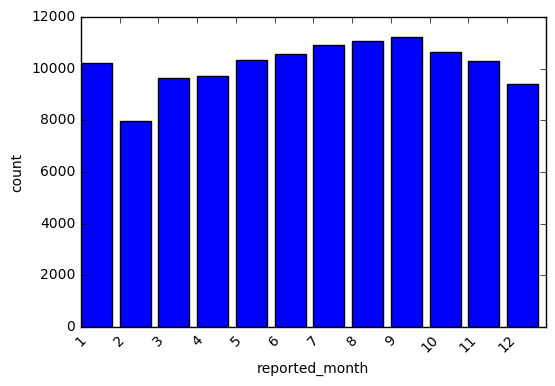

In [52]:
result = _
result.bar()
!echo 'count the number of crime each month'

there is least number of crime in Feb. there is most number of crime in Sep. Other month has no significant change.

count the number of crime in each area

In [53]:
%%sql
SELECT DISTINCT Area, COUNT(Report_No) as count
from crime_fact a join dim_location b on a.dim_location_id = b.dim_location_id
                     join dim_crime c on a.dim_crime_id = c.dim_crime_id
group by Area
Order by count desc
;

12 rows affected.


area,count
EPD,31257
CPD,30375
MPD,24137
SPD,13999
SCP,10962
NPD,9867
OSPD,934
Null,220
PD1,136
MP,6


count the number of crime in each area


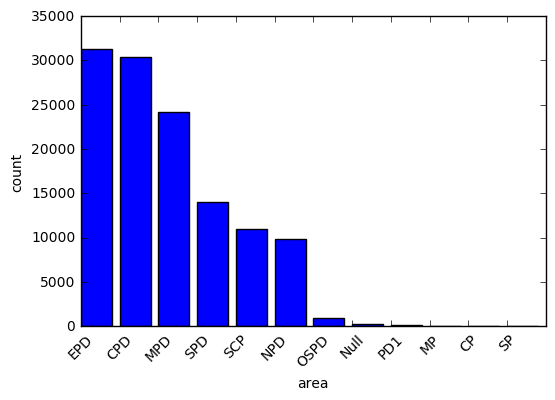

In [54]:
result = _
result.bar()
!echo 'count the number of crime in each area'

we can noticed that EPD hs most number of crime which is dangerous. SP has least number of crime wichi is relatively safe

count the number of crime in each crime type

In [55]:
%%sql
SELECT dim_crime.description, COUNT(*) 
FROM dim_crime, crime_fact
WHERE dim_crime.dim_crime_id = crime_fact.dim_crime_id
GROUP BY dim_crime.description
ORDER BY COUNT DESC
LIMIT 10;

10 rows affected.


description,count
Property Damage,20816
Burglary - Residence,18168
Non Agg Assault Dome,18054
Auto Theft,16698
Stealing From Auto,14938
Non Aggravated Assau,12544
Misc Violation,11708
Stealing Shoplifting,11280
Aggravated Assault (,10910
Stealing from Buildi,9814


count the number of crime in each crime type


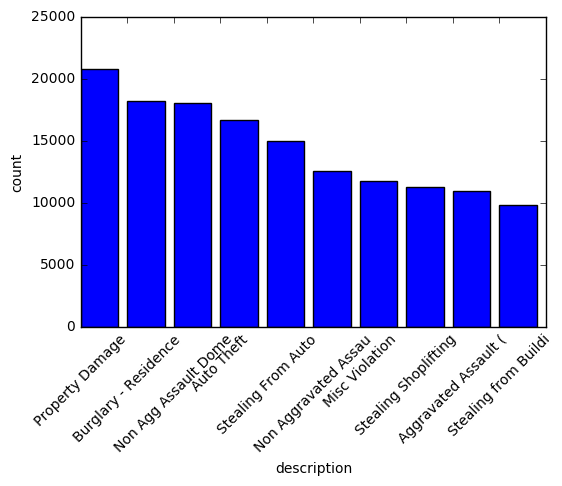

In [56]:
%matplotlib inline
result = _
result.bar()
!echo 'count the number of crime in each crime type'

there is most number of crime is related to property damage and least number of crime related to straling from building

count the number of crime in each day

In [57]:
%%sql
SELECT Reported_Day, COUNT(*) 
FROM dim_time, crime_fact
WHERE dim_time.dim_time_id = crime_fact.dim_time_id
GROUP BY dim_time.Reported_Day
ORDER BY Reported_Day;

31 rows affected.


reported_day,count
1,7712
2,8224
3,7938
4,7684
5,8018
6,8478
7,7774
8,8412
9,8428
10,7924


count the number of crime in each day


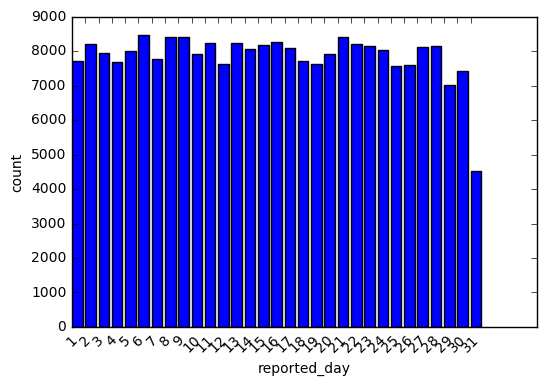

In [58]:
%matplotlib inline
result = _
result.bar()
!echo 'count the number of crime in each day'

there is no obvious fluctuation in every day but 31 has least number of crime since there is half of 31 in one year. 

## Bonus (10 points for one of A or B)


### Option A - Automating ETL

Consider the work you did to load your original raw dataset and then transform it into a dimensional model for analysis.  What would it take to automate this process?  How often would you need to update the data?  Could you easily automate any data cleaning steps?  What checks would you need to put in place to ensure quality?  Would humans need to be involved, or could you automate it all?

Discuss.

1.We will to automatically ensure that the data is valid and contains correct values, while data cleansing is the gatekeeper that protects tables from invalid, duplicated, or incorrect values.

2.We need to update the data every time unit.

3.Yes. 

4.We need to check if there is null value. we need to clean these null value to avoid error in queries.

5.I believe this could be automated and no human would need to be involved, provided that we don't have any missing values

### Option B - Augmenting dimensions

Considering your dimensional model, what external data could you find to augment it?  As in the case of bike trips, where weather might provide an interesting added dimension/context not present in the original data, you can probably find another source of data to complement your own model.  Identify one such source and add it to your model, demonstrating its value with a few new queries.